In [1]:
import pandas as pd 
import csv
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [2]:
data=r'C:\Users\ravi\Desktop\predictica2022\preddata\churn.csv'

In [3]:
df=pd.read_csv(data)

In [4]:
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


Exploratory Analysis

In [5]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [6]:
df.corr()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
state,1.000000,0.010334,0.013858,0.017054,0.007422,-0.030075,-0.027282,0.007334,-0.008166,0.007334,...,-0.005458,0.003896,0.009538,-0.001699,0.009532,-0.009313,0.009898,-0.009322,-0.012997,0.006946
account_length,0.010334,1.000000,-0.018054,0.004918,0.014681,-0.006650,-0.014575,-0.001017,0.028240,-0.001019,...,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001292,-0.001445,0.021203
area_code,0.013858,-0.018054,1.000000,-0.011648,0.032107,-0.003006,-0.003399,-0.019118,-0.019314,-0.019119,...,-0.012300,0.007114,0.002084,0.014657,0.002070,-0.004154,-0.013623,-0.004219,0.020921,0.010195
phone_number,0.017054,0.004918,-0.011648,1.000000,0.010463,0.014384,0.010649,0.002420,-0.012911,0.002415,...,0.022450,-0.006805,0.008814,0.012723,0.008806,-0.008109,-0.024928,-0.008056,0.028258,0.012371
international_plan,0.007422,0.014681,0.032107,0.010463,1.000000,0.009054,0.011947,0.028138,0.008102,0.028141,...,0.002505,0.021234,-0.026508,0.005623,-0.026510,0.031799,0.004493,0.031751,-0.012974,0.259123
voice_mail_plan,-0.030075,-0.006650,-0.003006,0.014384,0.009054,1.000000,0.954508,0.002059,-0.001735,0.002056,...,-0.005916,0.023332,0.005524,0.009176,0.005522,0.004116,-0.007525,0.004165,-0.014453,-0.110698
number_vmail_messages,-0.027282,-0.014575,-0.003399,0.010649,0.011947,0.954508,1.000000,0.005381,0.000883,0.005377,...,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505,-0.007086,-0.097633
total_day_minutes,0.007334,-0.001017,-0.019118,0.002420,0.028138,0.002059,0.005381,1.000000,0.001935,1.000000,...,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415,0.002733,0.207705
total_day_calls,-0.008166,0.028240,-0.019314,-0.012911,0.008102,-0.001735,0.000883,0.001935,1.000000,0.001936,...,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013161,-0.010739,0.016130
total_day_charge,0.007334,-0.001019,-0.019119,0.002415,0.028141,0.002056,0.005377,1.000000,0.001936,1.000000,...,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419,0.002726,0.207700


In [7]:
df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [8]:
df.dtypes

state                              int64
account_length                     int64
area_code                          int64
phone_number                       int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

In [9]:
df.isnull().sum()
df.duplicated().sum()

0

exploratory data analysis

In [10]:
catg=df.select_dtypes('object')
cont=df.select_dtypes('number')
conf=df.select_dtypes('float')
coni=df.select_dtypes('int')
target=df['class']

In [11]:
coni

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,110,99,91,3,1,0
1,35,107,415,2301,0,1,26,123,103,103,3,1,0
2,31,137,415,1616,0,0,0,114,110,104,5,0,0
3,35,84,408,2510,1,0,0,71,88,89,7,2,0
4,36,75,415,155,1,0,0,113,122,121,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,2000,0,1,40,127,126,116,5,2,0
4996,49,152,415,394,0,0,0,90,73,113,2,3,1
4997,7,61,415,313,0,0,0,89,128,97,4,1,0
4998,7,109,510,3471,0,0,0,67,92,89,6,0,0


In [12]:
y=df['class']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: class, Length: 5000, dtype: int64

Check for class balance

<AxesSubplot:xlabel='class', ylabel='count'>

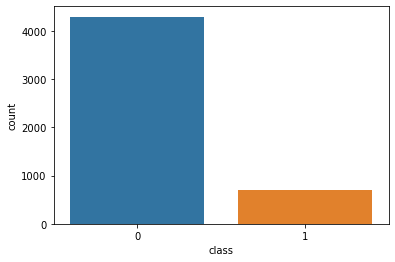

In [13]:
sns.countplot(x=y,data=df)

In [14]:
con_var=conf.columns
df[con_var]

,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge
0,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70
1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70
2,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29
3,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78
4,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73
...,...,...,...,...,...,...,...,...
4995,235.7,40.07,223.0,18.96,297.5,13.39,9.9,2.67
4996,184.2,31.31,256.8,21.83,213.6,9.61,14.7,3.97
4997,140.6,23.90,172.8,14.69,212.4,9.56,13.6,3.67
4998,188.8,32.10,171.7,14.59,224.4,10.10,8.5,2.30


Classification Model Building

Unbalanced dataset

In [15]:
X=df[con_var]
y=df['class']

In [16]:
from sklearn import linear_model
reg = linear_model.LogisticRegression()
reg.fit(X,y)
reg.coef_
lr=reg
X_train=X
X_test=X
y_test=y

In [17]:
# Predicting on the test data
pred_test = lr.predict(X_test)
pred_test
#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

The f1 score for the testing data: 0.049586776859504134


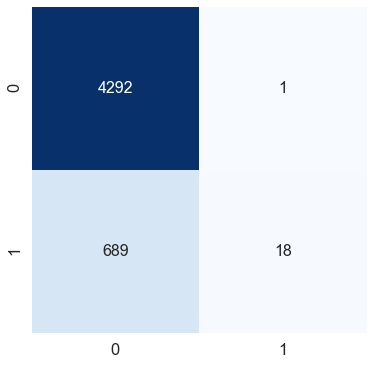

In [18]:

# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Calling function 
conf_matrix(y_test, pred_test)

Explanation

In [19]:
model=reg
X_train=X
X_test=X

In [20]:

import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap_valuesu=shap_values

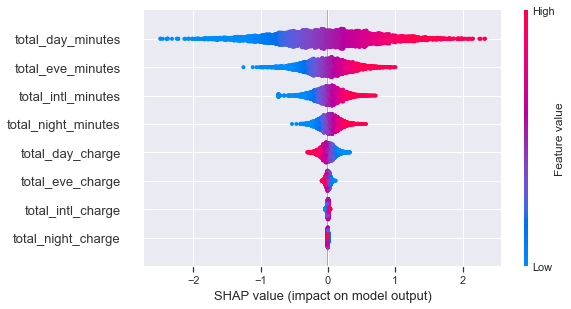

In [21]:
shap.plots.beeswarm(shap_values)

balanced model

In [22]:
from sklearn import linear_model
reg = linear_model.LogisticRegression(class_weight='balanced')
reg.fit(X,y)
reg.coef_
lr=reg
X_train=X
X_test=X
y_test=y

In [23]:
# Predicting on the test data
pred_test = lr.predict(X_test)
pred_test
#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

The f1 score for the testing data: 0.30588235294117644


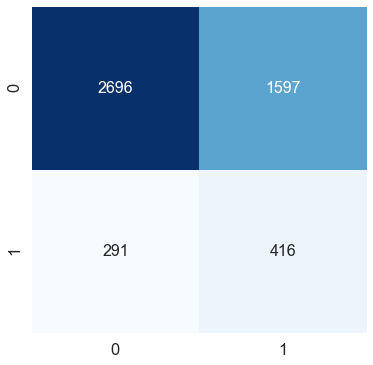

In [24]:

# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Calling function 
conf_matrix(y_test, pred_test)

In [25]:
model=reg
X_train=X
X_test=X

In [26]:

import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

In [27]:
shap_valuesb=shap_values

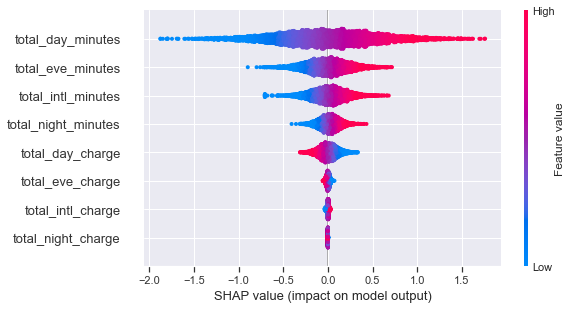

In [28]:
shap.plots.beeswarm(shap_values)

In [29]:
error=shap_valuesu-shap_valuesb

In [30]:
error

.values =
array([[ 2.81430205e-01,  3.94326861e-03, -8.45416023e-03, ...,
        -2.23874086e-03, -4.75670522e-04, -6.46452279e-05],
       [-6.63214482e-02, -9.29715538e-04, -1.18019936e-02, ...,
        -2.65189662e-03,  9.52422114e-03,  1.28213035e-03],
       [ 2.08519955e-01,  2.92160318e-03, -1.42719898e-01, ...,
         1.22613363e-03,  5.47021101e-03,  7.29952365e-04],
       ...,
       [-1.36879755e-01, -1.91815607e-03, -5.17997921e-02, ...,
        -8.77204811e-04,  9.25395380e-03,  1.24172709e-03],
       [ 2.50683583e-02,  3.52211542e-04, -5.37380114e-02, ...,
        -1.38425961e-03, -4.52968066e-03, -6.03355461e-04],
       [-1.74510851e-01, -2.44421686e-03,  1.14358463e-01, ...,
         1.55478027e-03, -2.36754192e-03, -3.20532589e-04]])

.base_values =
array([-1.85328142, -1.85328142, -1.85328142, ..., -1.85328142,
       -1.85328142, -1.85328142])

.data =
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0

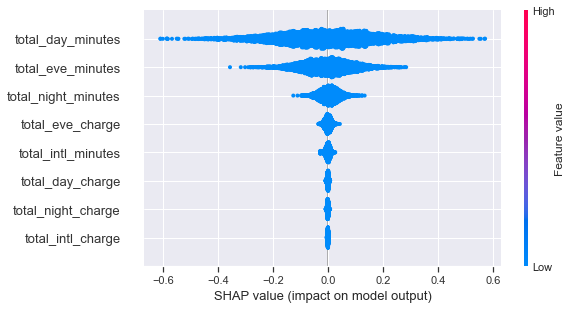

In [31]:
shap.plots.beeswarm(error)